In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random

In [2]:
# TEMPLATE TO RUN GILLESPIE SIMULATION OF MODEL

###################
# Helper functions (Do not change!)

def find_index_from_time(t_obs,time,start_index=0):  
    # loop through t_obs array from i=0  
    # stopping when t_obs[i+1] is greater than time  
    # so that t_obs[i] < time < t_obs[i+1]  
    # return i 
    i=start_index
    while i+1<len(t_obs):  
        if t_obs[i+1]>time:
            break
        i=i+1
    # i now stores index corresponding to system at time requested  
    return i 
      
def resample_observations(t_obs_in, s_obs_in, t_obs_out):
    s_obs_out=[] 
    pos=0 
    for time in t_obs_out:  
        i=find_index_from_time(t_obs_in,time, start_index=pos)
        si = s_obs_in[i]  
        s_obs_out.append(si) 
        pos = i
    return s_obs_out


def gen_next_event_time(rate):
    t=random.expovariate(rate)
    return t


def random_choice_from_pdf(pdf):
    cdf=[]
    cumulative_p=0
    for p in pdf:
        cumulative_p+=p
        cdf.append(cumulative_p)
    rand=random.random()

    for i in range(len(cdf)):
        if rand<cdf[i]:
            return i
    # last cdf should be 1.0 so the following should never happen!
    print("Error generating choice, check PDF")
    return None

In [3]:
def gillespie_repressilator(s0,t_obs_out,params):

    #--0--# Unpack parameters and species variables

    km, km0, kdm, kp, kdp, K, n = params 
    m_tetR, m_lacI, m_cI, p_tetR, p_lacI, p_cI = s0

    #--0--#

    # create arrays for output
    s_obs=[]
    t_obs=[]

    # read in start time and end time
    t_init=t_obs_out[0]
    t_final=t_obs_out[-1]

    t=t_init
    t_obs.append(t)
    s_obs.append(s0)

    while t < t_final:

        #--1--# Write labels for each event type here.

        types=["m_tetR_prod",
               "m_lacI_prod",
               "m_cI_prod",
               "m_tetR_loss",
               "m_lacI_loss",
               "m_cI_loss",
               "p_tetR_prod",
               "p_lacI_prod",
               "p_cI_prod",
               "p_tetR_loss",
               "p_lacI_loss",
               "p_cI_loss",
                ]

        #--1--#


        #--2--# Write rate expressions for each of the events

        # COPY YOUR RATE EQUATIONS FROM 
        # THE ODE REPRESSILATOR MODEL HERE
        # rate_m_tetR_prod = ...
        # rate_m_lacI_prod = ... etc
        
        
        #--2--#

        rate_m_tetR_prod = km*((K**n)/((K**n)+(p_lacI**n)))+km0 
        rate_m_lacI_prod = km*((K**n)/((K**n)+(p_cI**n)))+km0 
        rate_m_cI_prod   = km*((K**n)/((K**n)+(p_tetR**n)))+km0
    
        rate_p_tetR_prod = kp*m_tetR
        rate_p_lacI_prod = kp*m_lacI
        rate_p_cI_prod   = kp*m_cI
    
        rate_m_tetR_loss = kdm*m_tetR
        rate_m_lacI_loss = kdm*m_lacI
        rate_m_cI_loss   = kdm*m_cI
    
        rate_p_tetR_loss = kdp*p_tetR
        rate_p_lacI_loss = kdp*p_lacI
        rate_p_cI_loss   = kdp*p_cI

        #--3--# Store the rates into a list preserving the order of step 1.

        rates=[ rate_m_tetR_prod,
                rate_m_lacI_prod,
                rate_m_cI_prod,
                rate_m_tetR_loss,
                rate_m_lacI_loss,
                rate_m_cI_loss,
                rate_p_tetR_prod,
                rate_p_lacI_prod,
                rate_p_cI_prod,
                rate_p_tetR_loss,
                rate_p_lacI_loss,
                rate_p_cI_loss    ]

        #--3--#


        #-- Do not edit below --#

        ## CARRY OUT GILLESPIE ALGORITHM TO STEP FORWARD TO NEXT EVENT
        ## AND UPDATE SYSTEM STATE ACCORDING TO EVENT TYPE

        # calc total reaction rate
        rate_all_events=sum(rates)

        # if rate of events is zero break from loop
        # e.g. when all reactants used up
        if rate_all_events==0:
            break

        # generate the time until the next event
        # in accordance with rate_all_events
        next_event=gen_next_event_time(rate_all_events)

        # calc PDF for event type
        # in accordance with relative rates
        pdf=[]
        for event_rate in rates:
            p_event = event_rate/sum(rates)
            pdf.append(p_event)

        rand_i =  random_choice_from_pdf(pdf)
        event_type=types[rand_i]

        # increment time and number of molecules
        # according to event type
        t=t+next_event

        #-----------------------------------#



        ## ALGORITHM HAS INCREMENTED TIME AND SELECTED NEXT EVENT
        ## WE NOW NEED TO UPDATE OUR SYSTEM ACCORDING TO THE EVENT
        ## TYPE STORED IN VARIABLE event_type

        #--4--# Complete the if-elif-else commands to update the system
              # according to event type

        # complete the if-elif section below. The first one is 
        # provided as an example...
        
        if event_type=="m_tetR_prod":
            m_tetR += 1
        elif event_type=="m_lacI_prod":
            m_lacI += 1
        elif event_type=="m_cI_prod":
            m_cI += 1
        elif event_type=="m_tetR_loss":
            m_tetR -= 1
        elif event_type=="m_lacI_loss":
            m_lacI -= 1
        elif event_type=="m_cI_loss":
            m_cI -= 1
        elif event_type=="p_tetR_prod":
            p_tetR += 1
        elif event_type=="p_lacI_prod":
            p_lacI += 1
        elif event_type=="p_cI_prod":
            p_cI += 1
        elif event_type=="p_tetR_loss":
            p_tetR -= 1
        elif event_type=="p_lacI_loss":
            p_lacI -= 1
        elif event_type=="p_cI_loss":
            p_cI -= 1            
        else:
            print("error unknown event type!!")

        #--4--#

        # store observation
        s=[m_tetR, m_lacI, m_cI, p_tetR, p_lacI, p_cI]

        t_obs.append(t)
        s_obs.append(s)

        # loops until time t exceeds t_final

    # loop has ended

    # before we return the results we must
    # resample the output to provide observations in accordance
    # with the t_obs passed to the function
    s_obs_out=resample_observations(t_obs,s_obs,t_obs_out)
    return np.array(s_obs_out)

## Task 6a

In [4]:
# DEFINE INITIAL CONDITIONS AND PARAMETERS

# set random seed so that notebook results are reproducible
random.seed(42)

# default parameter values 
# to match Repressilator model
km = 30
km0 = 0.03
kdm = 0.3466
kp = 6.931
kdp = 0.06931
K = 40
n = 2
km = 0.5*60
km0 = km*1e-4

params = [km, km0, kdm, kp, kdp, K, n]


#intitial condtions
m_tetR0 = 5
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 0
p_lacI0 = 0
p_cI0   = 0

s0 = [m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0]

# set time observations
t_max=1000
t_obs=np.linspace(0,t_max,t_max*5+1) # 5 observations a minute

# run simulation
s_obs=gillespie_repressilator(s0,t_obs,params)

m_tetR_obs = s_obs[:,0]
m_lacI_obs = s_obs[:,1]
m_cI_obs   = s_obs[:,2]
p_tetR_obs = s_obs[:,3]
p_lacI_obs = s_obs[:,4]
p_cI_obs   = s_obs[:,5]

### Repressilator Stochastic simulation

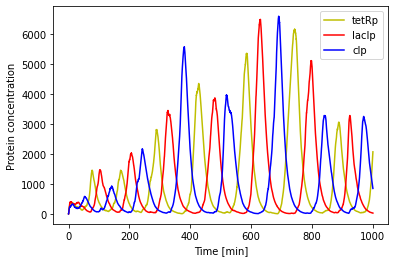

In [5]:
%matplotlib inline
fig, ax = plt.subplots(1,1)

ax.plot(t_obs, p_tetR_obs, "y-", label="tetRp")
ax.plot(t_obs, p_lacI_obs, "r-", label="lacIp")
ax.plot(t_obs, p_cI_obs, "b-", label="cIp")
ax.legend()
ax.set_xlabel("Time [min]")
ax.set_ylabel("Protein concentration")

# plt.savefig("Task6_figure1.png")

In [6]:
# default parameter values 
# to match Repressilator model
km = 30
km0 = 0.03
kdm = 0.3466
kp = 6.931
kdp = 0.06931
K = 40
n = 2
km = 0.5*60
km0 = km*1e-4

params = [km, km0, kdm, kp, kdp, K, n]


#intitial condtions
m_tetR0 = 5
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 0
p_lacI0 = 0
p_cI0   = 0

s0 = [ m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0 ]

# set time observations
t_max=1000
t_obs=np.linspace(0,t_max,t_max*5+1) # 5 observations a minute

### Repressilator Stochastic Overlay

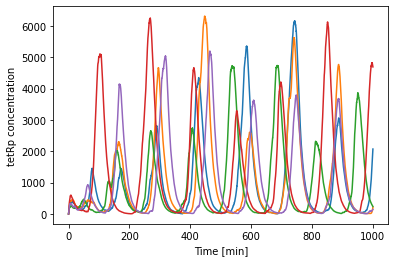

In [7]:
seeds = [42, 
         6.67408*10e-11, 
         299792.458, 
         554.984319180, 
         6.02214076*10e23]

fig, ax = plt.subplots(1,1)

for seed in seeds:
    random.seed(seed)
    
    s_obs=gillespie_repressilator(s0,t_obs,params)

    m_tetR_obs = s_obs[:,0]
    m_lacI_obs = s_obs[:,1]
    m_cI_obs   = s_obs[:,2]
    p_tetR_obs = s_obs[:,3]
    p_lacI_obs = s_obs[:,4]
    p_cI_obs   = s_obs[:,5]
    
    ax.plot(t_obs, p_tetR_obs)

ax.set_xlabel("Time [min]")
ax.set_ylabel("tetRp concentration")

# plt.savefig("Task6_figure2.png")

## Task 6b

In [8]:
# The peak_finder function that identifies the peaks in a sequence of observations
# it returns a list of identified maxima, with each item in the list
# storing peak time and peak height
# e.g. maxima =  peak_finder(t_obs, x_obs, 400)
# to examine first peak found with threshold set to 400
# peak_time   = maxima[0][0]
# peak_height = maxima[0][1]

def peak_finder(t_obs, x_obs, threshold=100):
    n_obs = len(t_obs)
    maxima = []
    minima = [] 
    # note minima are stored but not returned as we 
    # are only interested in maxima for this analysis
    
    # this stores the current seen maximum values
    stored_max_x = x_obs[0]
    stored_max_t = t_obs[0]
    
    # set search_dir to +1 to search for next maximum
    # set search_dir to -1 to search for next minimum

    search_dir = 1
    
    # initialise search direction (i.e. looking for max or min?)
    for i in range(n_obs):
        if x_obs[i]>x_obs[0]+threshold:
            # x initially increases, start by looking for max
            search_dir = 1
            break
        if x_obs[i]<x_obs[0]-threshold:
            # x initially decreases, start by looking for min
            search_dir = -1
            break
            
    # algorithm that runs the search
    for i in range(n_obs):
        if x_obs[i]*search_dir > stored_max_x*search_dir:
            stored_max_x = x_obs[i]
            stored_max_t = t_obs[i]
        if x_obs[i]*search_dir < stored_max_x*search_dir - threshold:
            if search_dir > 0:
                maxima.append((stored_max_t,stored_max_x))
            else:
                minima.append((stored_max_t,stored_max_x))
            stored_max_x = x_obs[i]
            stored_max_t = t_obs[i]
            search_dir = -1*search_dir
    return maxima

def period_seek(t_obs, x_obs, peak):
    # utilising peak_finder() to calculate the periods of obsed amplitudes
    
    peak_ts = [obs[0] for obs in peak_finder(t_obs, x_obs, peak)]
    periods = [peak_ts[idx+1]-peak_ts[idx] for idx in range(len(peak_ts)-1)]
    
    return(periods)

In [9]:
s_obs_list=np.load('repressilator_output.npz')["obj"]

# reproduce the t_obs array used when simulating the runs
t_max=1000
t_obs=np.linspace(0,t_max,t_max*5+1) # 5 obs each minute

#### Suplementary Figure - Identification of oscillation peaks in simulation results

Figure(432x288)


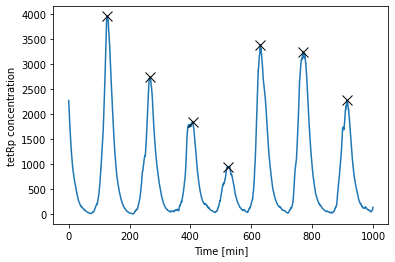

In [10]:
run = s_obs_list[0]

m_tetR_obs = run[:,0]
m_lacI_obs = run[:,1]
m_cI_obs =   run[:,2]

p_tetR_obs = run[:,3]
p_lacI_obs = run[:,4]
p_cI_obs =   run[:,5]

peaks = peak_finder(t_obs, p_tetR_obs, 400)

fig, ax = plt.subplots(1,1)
ax.plot(t_obs, p_tetR_obs)

for peak in peaks:
    ax.plot(peak[0], peak[1], "kx", markersize=10)

ax.set_xlabel("Time [min]")
ax.set_ylabel("tetRp concentration")

print(fig)

### Oscillation period distribution of stochastic simulation

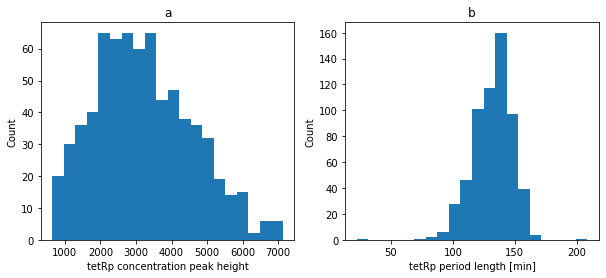

In [11]:
heights = []
periods = []

for run in s_obs_list:
    m_tetR_obs = run[:,0]
    m_lacI_obs = run[:,1]
    m_cI_obs =   run[:,2]

    p_tetR_obs = run[:,3]
    p_lacI_obs = run[:,4]
    p_cI_obs =   run[:,5]
    
    heights += [peak[1] for peak in peak_finder(t_obs, p_tetR_obs, 400)]
    
    periods +=  period_seek(t_obs, p_tetR_obs, 400)
    
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax1, ax2 = ax

ax1.hist(heights, bins=20)
ax1.set_title("a")
ax1.set_xlabel("tetRp concentration peak height")
ax1.set_ylabel("Count")

ax2.hist(periods, bins=20)
ax2.set_title("b")
ax2.set_xlabel("tetRp period length [min]")
ax2.set_ylabel("Count")   

# plt.savefig("Task6_figure3.png")